In [1]:
from sys import path
path.append("..")
from pib_lib import particle_in_a_box as pib
from pib_lib import Special_States as sp
from pib_lib import update_plot as up
import mpld3
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['animation.writer'] = 'ffmpeg'
plt.rcParams["animation.html"] = "jshtml"

In [23]:
pib_state = pib.Particle_in_Box_Immediate_Mode("symmetric", 1, 1, [3,4],[1,1], gamma=0.001)
rev_time = up.revival_time(pib_state)

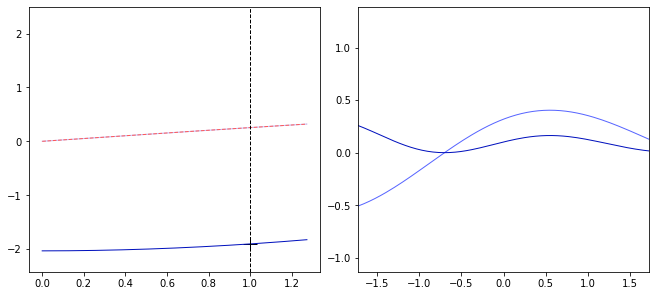

In [26]:
fig = plt.figure(figsize=(9,4), constrained_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)
ax = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
pos_exp_val = up.Position_Expectation_Value_Evolution(pib_state, fig, ax)
mom_exp_val = up.Momentum_Expectation_Value_Evolution(pib_state, fig, ax).plot_config(color=up.light_blue)
pos_exp_deriv = up.Pos_Exp_Deriv_Evolution(pib_state, fig, ax).plot_config(color=up.mid_red)
pos_exp_deriv.plot_config(linestyle="--")
exp_val_marker = up.Position_Expectation_Value_Marker(pib_state, fig, ax)
exp_val_line = up.Expectation_Value_Evolution_Time(pib_state, fig, ax)
pos_space_wave = up.postion_space_plot(pib_state, fig, ax2, abs_square=True, real_part=True)

c_plot = up.Update_Plot_Collection(fig, pos_exp_val, mom_exp_val, pos_exp_deriv, exp_val_marker, exp_val_line)
tot_plot = up.Update_Plot_Collection(fig, pos_space_wave, c_plot)

pib_state.case = "symmetric"
pib_state.gamma = 0.01
c_plot.set_t(1).set_t_range([0,rev_time])
pib_state.L = np.pi
#c_plot.plot()
tot_plot.anim("L", np.pi, 10, 20, 2)


In [4]:
L = np.pi
m = 1/(4*np.pi)
a = L/10
l_0 = 40
l_range = 40
T = 4*m*L**2/np.pi

pib_state = sp.Bouncing_Gaussian("dirichlet", L, m, l_0, l_range, a)
rev_time = up.revival_time(pib_state)

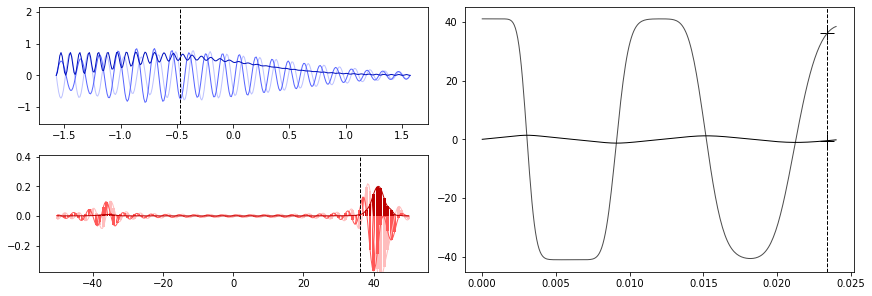

In [5]:
fig = plt.figure(figsize=(12,4), constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=2)
ax = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[:,1])
#ax.set_ylim([-2.5, 2.5])
#ax2.set_ylim([-0.4, 0.4])

pos_space_plot = up.postion_space_plot(pib_state, fig, ax, abs_square=True, real_part=True, imag_part=True, expectation_value=True)
momentum_space_plot = up.momentum_space_plot(pib_state, fig, ax2, abs_square=True, real_part=True, imag_part=True)
new_momentum_space_plot = up.new_momentum_space_plot(pib_state, fig, ax2, abs_square=True, real_part=True, imag_part=True, expectation_value=True)
expectation_value_plot = up.expectation_value_evolution(pib_state, fig, ax3, 
                                                        position_expectation_value=True, momentum_expectation_value=True,
                                                        time_indicator_line=True, time_marker_momentum=True, time_marker_position=True).set_t_range([0, 0.012])
momentum_space_plot["abs_square"].plot_config(color=up.dark_red)
momentum_space_plot["real_part"].plot_config(color=up.mid_red)
momentum_space_plot["imag_part"].plot_config(color=up.light_red)
new_momentum_space_plot["abs_square"].plot_config(color=up.dark_red)
new_momentum_space_plot["real_part"].plot_config(color=up.mid_red)
new_momentum_space_plot["imag_part"].plot_config(color=up.light_red)
expectation_value_plot.set_t_range([0, 0.024])

plot_all = up.Update_Plot_Collection(fig, pos_space_plot, momentum_space_plot, new_momentum_space_plot, expectation_value_plot)
plot_all.set_t(0.0023).set_n_bound(50)
plot_all.plot()
plot_all.anim("t", 0, 0.024, 20, 2)

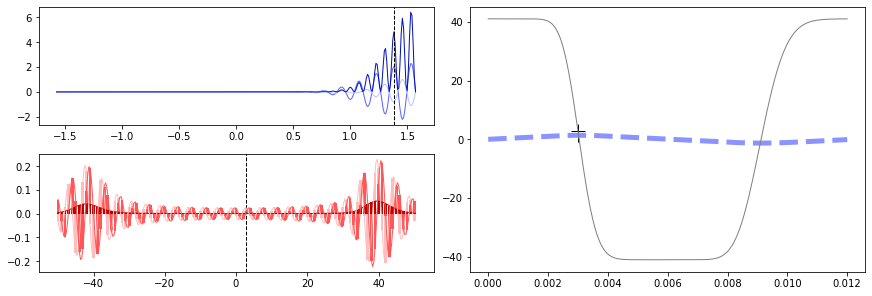

In [37]:
fig = plt.figure(figsize=(12,4), constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=2)
ax = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[:,1])

pib_pos_plot_re = up.Position_Space_Plot(pib_state, "real", fig, ax).plot_config(color=up.mid_blue)
pib_pos_plot_im = up.Position_Space_Plot(pib_state, "imag", fig, ax).plot_config(color=up.light_blue)
pib_pos_plot_abs = up.Position_Space_Plot(pib_state, "abs_square", fig, ax)
pib_pos_exp = up.Position_Expectation_Value(pib_state, fig, ax)

pib_k_plot_re = up.Momentum_Space_Plot(pib_state, "real", fig, ax2).plot_config(color=up.mid_red)
pib_k_plot_im = up.Momentum_Space_Plot(pib_state, "imag", fig, ax2).plot_config(color=up.light_red)
pib_k_plot_abs = up.Momentum_Space_Plot(pib_state, "abs_square", fig, ax2).plot_config(color=up.dark_red)
pib_k_exp = up.Momentum_Expectation_Value(pib_state, fig, ax2)

pib_newk_plot_re = up.New_Momentum_Space_Plot(pib_state, "real", fig, ax2).plot_config(color=up.mid_red)
pib_newk_plot_im = up.New_Momentum_Space_Plot(pib_state, "imag", fig, ax2).plot_config(color=up.light_red)
pib_newk_plot_abs = up.New_Momentum_Space_Plot(pib_state, "abs_square", fig, ax2).plot_config(color=up.dark_red).set_n_bound(80)

pib_exp_line_pos = up.Position_Expectation_Value_Evolution(pib_state, fig, ax3).plot_config(color="0.1")
pib_exp_line_k = up.Momentum_Expectation_Value_Evolution(pib_state, fig, ax3).plot_config(color="0.5")
exp_marker_pos = up.Position_Expectation_Value_Marker(pib_state, fig, ax3)
exp_marker_k = up.Momentum_Expectation_Value_Marker(pib_state, fig, ax3)

c_plot = up.Update_Plot_Collection(fig, pib_pos_plot_re, pib_pos_plot_im, pib_pos_plot_abs, pib_pos_exp, 
                                    pib_k_exp, pib_k_plot_abs, pib_k_plot_im, pib_k_plot_re,
                                    pib_newk_plot_im, pib_newk_plot_re, pib_newk_plot_abs,
                                    pib_exp_line_pos, pib_exp_line_k, exp_marker_pos, exp_marker_k)
c_plot.set_t_range([0, 0.012])
c_plot.set_n_bound(50)
c_plot.set_t(0.003)
pib_state.case = "dirichlet"
pib_exp_line_pos.plot_config(linewidth=5, color=up.less_light_blue, linestyle="--")
pib_state.L = np.pi
c_plot.plot()
#c_plot.anim("t", 0, 0.012, 20, 0.01)
#c_plot = up.Update_Plot_Collection(fig, pib_pos_plot_abs, pib_pos_exp, pib_newk_plot_abs, pib_k_exp)
#c_plot.anim("t", 0, rev_time/2, 20, 0.1)
#c_plot.set_t(rev_time/2).plot()